Use the following dataset - https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
# use this commend to unzip the file. work only in google colab 
!unzip imdb-dataset-of-50k-movie-reviews.zip 

In [ ]:
import zipfile

# Unzip the downloaded file at every where
with zipfile.ZipFile("imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
    zip_ref.extractall(".")

# Problem 1

### Apply all the preprocessing techniques that you think are necessary

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.isnull().sum()

,0
review,0
sentiment,0


In [5]:
df['review'].duplicated().sum()

418

In [6]:
df['review'].value_counts().sum()

50000

In [7]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


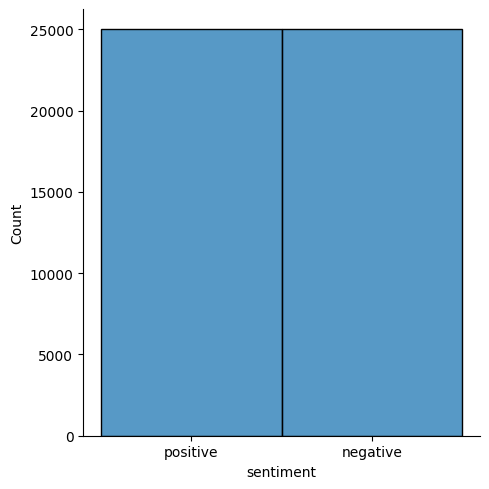

In [8]:
sns.displot(df['sentiment'])
plt.show()

# Problem 2

### Find out the number of words in the entire corpus and also the total number of unique words(vocabulary) using just python

In [16]:
# find the corpus of the dataset using combine all review
corpus = ' '.join(df['review'])
vocabulary = set(corpus.split())


In [17]:
print(f'The total number of word in dataset review column is {len(corpus)}')
print(f'The total number of unique words in the entire corpus is {len(vocabulary)}')


The total number of word in dataset review column is 65521550
The total number of unique words in the entire corpus is 438729


# Problem 3

### Apply One Hot Encoding

In [33]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(max_categories=50)
ohe = OHE.fit_transform(df[['review']]).toarray()


In [34]:
ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [35]:
ohe[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [36]:
ohe[0].shape

(50,)

In [40]:
ohe[0].size

50

In [39]:
ohe[0].ndim

1

In [38]:
ohe.ndim

2

In [37]:
ohe.shape

(50000, 50)

#### By default, the `max_categories` parameter in OneHotEncoder is set to None, meaning there is no limit on the number of categories. This will one-hot encode all unique categories found in the data.

In [26]:
ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
ohe[0].size

49582

In [32]:
ohe[0].shape

(49582,)

In [25]:
ohe.shape

(50000, 49582)

In [28]:
ohe.ndim

2

In [27]:
ohe.size

2479100000

# Problem 4

### Apply bag words and find the vocabulary also find the times each word has occured

#### Not specify the max_features parameter

```This error occurs because your system doesn’t have enough memory to convert a large sparse matrix to a dense NumPy array. The shape (50000, 101895) suggests that you have 50,000 samples and 101,895 unique features, which requires around 38 GB of memory when stored as a dense matrix. When you do not specify the max_features parameter, the vectorizer includes all unique features, which can lead to memory issues for large datasets.```

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bow = cv.fit_transform(df['review'])

In [14]:
bow.shape

(50000, 101895)

In [16]:
bow.size

6826529

In [17]:
bow.ndim

2

In [22]:
bow[0].toarray().shape

(1, 101895)

In [23]:
bow[0].toarray().ndim

2

In [30]:
len(cv.vocabulary_)

1000

In [36]:
cv.get_feature_names_out().size

1000

In [33]:
bow.sum(axis=0).A1

array([208, 619,   2, ...,   1,   1,   1])

In [34]:
bow.sum(axis=0).A1.size

101895

#### specify the max_features parameter

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1200)
bow = cv.fit_transform(df['review']).toarray()

In [49]:
bow

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
bow[0]

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
bow[0].shape

(1200,)

In [52]:
bow[0].ndim


1

In [53]:
cv.get_feature_names_out().size

1200

In [54]:
len(cv.vocabulary_)

1200

In [57]:
bow.sum(axis=0)

array([ 8614,   928,  1037, ..., 11497,  1930,  1176])

# Problem 5

### Apply bag of bi-gram and bag of tri-gram and write down your observation about the dimensionality of the vocabulary

#### Bi-gram

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000, ngram_range=(2,2))
bow = cv.fit_transform(df['review']).toarray()

In [59]:
bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [63]:
bow.size

50000000

In [62]:
bow.ndim

2

In [65]:
bow.shape

(50000, 1000)

In [64]:
bow[0].shape

(1000,)

In [66]:
bow[0].ndim

1

In [70]:
cv.vocabulary_

{'one of': np.int64(579),
 'of the': np.int64(555),
 'the other': np.int64(747),
 'you ll': np.int64(989),
 'they are': np.int64(795),
 'as this': np.int64(98),
 'this is': np.int64(812),
 'br br': np.int64(133),
 'br the': np.int64(141),
 'the first': np.int64(719),
 'thing that': np.int64(804),
 'set in': np.int64(643),
 'from the': np.int64(256),
 'is not': np.int64(369),
 'for the': np.int64(249),
 'this show': np.int64(815),
 'in the': np.int64(346),
 'use of': np.int64(885),
 'br it': np.int64(137),
 'it is': np.int64(406),
 'that is': np.int64(677),
 'is the': np.int64(381),
 'to the': np.int64(861),
 'all the': np.int64(13),
 'on the': np.int64(573),
 'and more': np.int64(47),
 'the main': np.int64(732),
 'the show': np.int64(768),
 'show is': np.int64(649),
 'due to': np.int64(201),
 'the fact': np.int64(715),
 'fact that': np.int64(214),
 'that it': np.int64(678),
 'around the': np.int64(84),
 'it was': np.int64(426),
 'for it': np.int64(244),
 'it but': np.int64(395),
 'but 

In [69]:
cv.get_feature_names_out()

array(['able to', 'about it', 'about the', 'about this', 'acting and',
       'acting is', 'acting was', 'after all', 'after the', 'all in',
       'all of', 'all over', 'all that', 'all the', 'all this',
       'all time', 'along the', 'along with', 'also the', 'amount of',
       'an excellent', 'an hour', 'an interesting', 'an old', 'and all',
       'and also', 'and an', 'and are', 'and as', 'and at', 'and can',
       'and don', 'and even', 'and for', 'and had', 'and has', 'and have',
       'and he', 'and her', 'and his', 'and how', 'and if', 'and in',
       'and is', 'and it', 'and its', 'and just', 'and more', 'and most',
       'and no', 'and not', 'and of', 'and on', 'and one', 'and over',
       'and she', 'and so', 'and some', 'and that', 'and the',
       'and their', 'and then', 'and there', 'and they', 'and this',
       'and to', 'and very', 'and was', 'and we', 'and what', 'and when',
       'and with', 'and you', 'any of', 'any other', 'anyone who',
       'are all',

#### Tri_gram

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1200, ngram_range=(3,3))

bow = cv.fit_transform(df['review']).toarray()

In [84]:
bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
bow.shape

(50000, 1200)

In [86]:
bow.ndim

2

In [87]:
bow[0].shape

(1200,)

In [88]:
bow.size

60000000

In [89]:
cv.vocabulary_

{'one of the': np.int64(666),
 'of the other': np.int64(631),
 'you ll be': np.int64(1190),
 'me br br': np.int64(542),
 'br br the': np.int64(172),
 'br the first': np.int64(203),
 'this is not': np.int64(985),
 'br br it': np.int64(155),
 'br it is': np.int64(195),
 'that is the': np.int64(758),
 'br br would': np.int64(189),
 'of the show': np.int64(637),
 'the show is': np.int64(904),
 'due to the': np.int64(259),
 'the fact that': np.int64(818),
 'fact that it': np.int64(272),
 'if you can': np.int64(366),
 'you can get': np.int64(1182),
 'the actors are': np.int64(781),
 'but it is': np.int64(219),
 'of the great': np.int64(623),
 'life br br': np.int64(526),
 'the plot is': np.int64(888),
 'the dialogue is': np.int64(804),
 'and the characters': np.int64(45),
 'the characters are': np.int64(798),
 'thought it was': np.int64(1024),
 'br br this': np.int64(177),
 'this was the': np.int64(1022),
 'may not be': np.int64(541),
 'but it was': np.int64(222),
 'all the time': np.int64(1

In [92]:
cv.get_feature_names_out().size

1200

While the combination of n-grams is indeed different, the dimensions may still be the same due to feature limiting and overlaps in frequently occurring n-grams. Adjusting max_features, analyzing overlaps, or allowing the full vocabulary can provide more clarity and variation in the dimensionality of your n-gram representations.

# Problem 6

### Apply tf-idf and find out the idf scores of words, also find out the vocabulary.

Same error with `tf-idf` which is occur above with `one hot encoding` . You must specify the max_features parameter when the dataset large

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

bow = tfidf.fit_transform(df['review'])

In [101]:
bow.shape

(50000, 101895)

In [102]:
bow.ndim

2

In [104]:
tfidf.get_feature_names_out().size

101895

In [106]:
len(tfidf.vocabulary_)

101895

#### Specify the max_feature for tfidf

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

bow = tfidf.fit_transform(df['review']).toarray()

In [108]:
bow

array([[0.        , 0.        , 0.        , ..., 0.04940528, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13067749, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [109]:
bow.shape

(50000, 1000)

In [110]:
bow.ndim

2

In [111]:
bow[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03363693, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04442275, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02967405, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03081097, 0.11111843, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05704899, 0.        ,
       0.05598164, 0.        , 0.10365038, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.11967091, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [112]:
bow[0].shape

(1000,)

In [115]:
len(tfidf.vocabulary_)

1000

In [117]:
tfidf.get_feature_names_out().size

1000

In [120]:
tfidf.idf_

array([3.00190808, 4.61416311, 4.79603933, 4.87282229, 4.05211101,
       1.87906312, 4.45778773, 3.88995185, 4.3126572 , 4.14518079,
       4.64660654, 2.54207968, 3.40397359, 3.55723931, 2.92938773,
       4.2059796 , 4.6186274 , 2.98560697, 4.45461816, 4.78189232,
       2.48159254, 3.05480795, 4.02127523, 4.31816383, 4.26284771,
       4.82403213, 4.79159685, 1.65768421, 3.24113377, 4.32203658,
       3.69505526, 4.02621148, 2.36627647, 3.44532139, 3.25553069,
       3.36554489, 4.14239785, 4.73893039, 3.69032852, 4.54047945,
       1.72119635, 1.03457004, 4.92411559, 4.38672294, 2.94465097,
       2.47807883, 3.35347742, 3.29424018, 4.16440764, 4.78189232,
       4.43394721, 4.77751211, 4.50524545, 1.59346665, 4.44391614,
       3.12730815, 4.24318852, 1.44755788, 4.78982537, 1.66633053,
       4.67145254, 4.2984803 , 4.84065301, 4.39324921, 3.6524463 ,
       4.65662589, 4.55157526, 3.3425941 , 3.85286479, 4.95390721,
       2.87616158, 4.75932192, 2.44487611, 4.78101474, 3.95461

In [124]:
# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(bow, columns=tfidf.get_feature_names_out())


In [132]:
tfidf_df.sample(5)

,10,20,30,80,able,about,above,absolutely,across,act,...,year,years,yes,yet,york,you,young,your,yourself,zombie
33229,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,...,0.109522,0.000000,0.0,0.0,0.0,0.048770,0.0,0.0,0.0,0.0
403,0.0,0.0,0.0,0.0,0.08847,0.041026,0.0,0.0,0.0,0.090502,...,0.078533,0.000000,0.0,0.0,0.0,0.034970,0.0,0.0,0.0,0.0
22542,0.0,0.0,0.0,0.0,0.00000,0.030867,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.105246,0.0,0.0,0.0,0.0
32697,0.0,0.0,0.0,0.0,0.00000,0.056514,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.192691,0.0,0.0,0.0,0.0
12636,0.0,0.0,0.0,0.0,0.00000,0.129142,0.0,0.0,0.0,0.000000,...,0.000000,0.101463,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [126]:
# Create a DataFrame for better readability
idf_df = pd.DataFrame(tfidf.idf_, index=tfidf.get_feature_names_out(), columns=["IDF Score"])


In [130]:
idf_df.sample(5)

,IDF Score
recently,4.812198
through,2.857150
since,3.316907
know,2.641052
dull,4.579866
